# 1.导入包及数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import preprocessing
from vmdpy import VMD  
import akshare as ak #大豆数据集
from scipy.fftpack import fft ##傅里叶级数
import pkuseg   #分词包
import re
from snownlp import SnowNLP #中文情感分析包
import math
import seaborn

from sklearn.feature_extraction.text import CountVectorizer #sklearn的统计词特征包
from sklearn.feature_extraction.text import TfidfTransformer #sklearn的TF-IDF包





#下载数据
Data=pd.read_csv("./data.csv")
Data.head()


,Unnamed: 0,date,open,high,low,close,volume,hold,settle,return,volatility
0,1,2010/1/4,4080,4090,4049,4057,321838,284296,0,0.00000,0.0
1,2,2010/1/5,4067,4082,4060,4066,253640,283384,0,0.00222,0.0
2,3,2010/1/6,4066,4194,4057,4154,860812,352830,0,0.02141,0.0
3,4,2010/1/7,4165,4188,3975,4044,705704,297236,0,-0.02684,0.0
4,5,2010/1/8,4040,4050,3947,3981,526594,270074,0,-0.01570,0.0


In [2]:
#数据处理
Data.date=pd.to_datetime(Data.date)
Data.drop(columns={'Unnamed: 0'},inplace=True)
Data.head()

,date,open,high,low,close,volume,hold,settle,return,volatility
0,2010-01-04,4080,4090,4049,4057,321838,284296,0,0.00000,0.0
1,2010-01-05,4067,4082,4060,4066,253640,283384,0,0.00222,0.0
2,2010-01-06,4066,4194,4057,4154,860812,352830,0,0.02141,0.0
3,2010-01-07,4165,4188,3975,4044,705704,297236,0,-0.02684,0.0
4,2010-01-08,4040,4050,3947,3981,526594,270074,0,-0.01570,0.0


#### 标准化数据

In [3]:
minmax = preprocessing.MinMaxScaler()
data_minmax = minmax.fit_transform(Data[['return','volatility']])
data_minmax_list = data_minmax.tolist()
data_minmax_list


[[0.3837096865934816, 0.0],
 [0.39633695466697, 0.0],
 [0.5054888800409533, 0.0],
 [0.2310448779932882, 0.0],
 [0.2944087367043968, 0.0],
 [0.4546954098174165, 0.0],
 [0.34548660485751664, 0.3921082825615603],
 [0.24714180080769013, 0.43865225247349965],
 [0.3982139810022183, 0.4392192094036163],
 [0.3779079688299869, 0.34592342333481246],
 [0.37500710994823955, 0.28844645621893567],
 [0.3982139810022183, 0.2694883938449764],
 [0.2989022239918093, 0.23869531262456536],
 [0.4423525396735112, 0.2809240528268021],
 [0.3661907741311643, 0.18321599899446936],
 [0.41578977305045217, 0.19050358530889935],
 [0.3457710027870997, 0.19924358461728645],
 [0.43763153404243216, 0.22074956240988583],
 [0.297480234343894, 0.2596416326951513],
 [0.36897787384107844, 0.22260353538438665],
 [0.25681133041351456, 0.26574418480890877],
 [0.3336556509868608, 0.2669250776149128],
 [0.4548660485751664, 0.3001834793140442],
 [0.34298390307718557, 0.30051297902735613],
 [0.42898583698310677, 0.29380635273376565

In [4]:
#建空列表把循环出来每次嵌套列表的数装在新的列表中
empt_return=[]
empt_volatility=[]
for i in range(len(data_minmax_list)):
    empt_return.append(data_minmax_list[i][0])
    empt_volatility.append(data_minmax_list[i][1])
Data['return']=empt_return
Data['volatility']=empt_volatility
Data=Data.drop(Data.index[0])
Data=Data.drop(Data.index[2300:])
Data

,date,open,high,low,close,volume,hold,settle,return,volatility
1,2010-01-05,4067,4082,4060,4066,253640,283384,0,0.396337,0.000000
2,2010-01-06,4066,4194,4057,4154,860812,352830,0,0.505489,0.000000
3,2010-01-07,4165,4188,3975,4044,705704,297236,0,0.231045,0.000000
4,2010-01-08,4040,4050,3947,3981,526594,270074,0,0.294409,0.000000
5,2010-01-11,4012,4050,4012,4031,316116,270738,0,0.454695,0.000000
...,...,...,...,...,...,...,...,...,...,...
2296,2019-06-24,3431,3450,3413,3443,113540,136370,3433,0.388658,0.131966
2297,2019-06-25,3450,3484,3442,3472,119440,127394,3462,0.431432,0.155605
2298,2019-06-26,3467,3479,3426,3432,106046,134798,3443,0.317786,0.167465
2299,2019-06-27,3436,3447,3417,3430,86202,143030,3430,0.380411,0.143537


# 2.VMD分解 Return&Volatility 

### vmd参数设置及绘制分解模态图

Text(0.5, 1.0, 'Decomposed modes of volatility')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


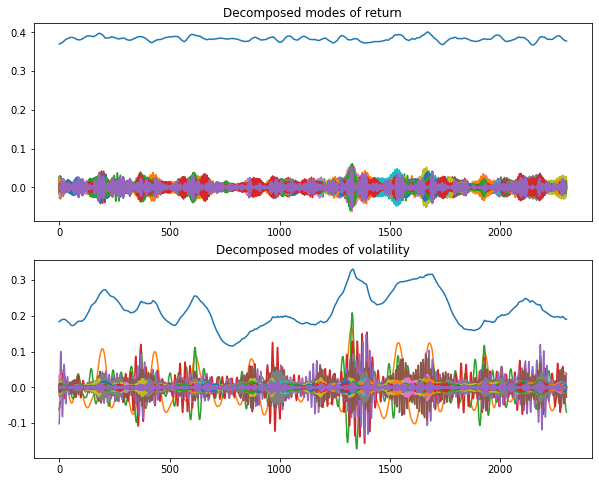

In [5]:
#1.导入文件，可以指定列也可以，就是usecols
# filename= 'data.csv'
# f = pd.read_csv(Data,usecols=[9,10])
f=Data[['return','volatility']]
#vmd包参数设置并执行VMD
alpha = 5000       #宽带限制，一般为数据点的1.5-2倍  
tau = 0.           # 噪声限制 (no strict fidelity enforcement)  
K = 15            # 分解模态个数  
DC = 0             # 合成信号若无常量则为0；若含常量，则其取值为 1；  
init = 1           # 初始化ω值,当初始化为1时,均匀分布产生的随机数； 
tol = 1e-7         # 控制误差大小常量，决定精度与迭代次数

u, u_hat, omega = VMD(f['return'], alpha, tau, K, DC, init, tol)  
u1,u1_hat,omega1 = VMD(f['volatility'], alpha, tau, K, DC, init, tol)  
#绘制分解模态图
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(u.T)
plt.title('Decomposed modes of return')
plt.subplot(2,1,2)
plt.plot(u1.T)
plt.title('Decomposed modes of volatility')



### IMF of return

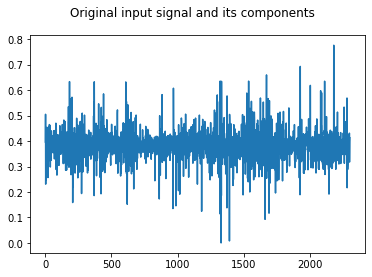

<Figure size 500x500 with 0 Axes>

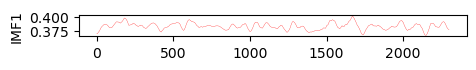

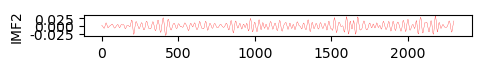

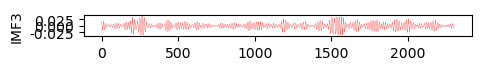

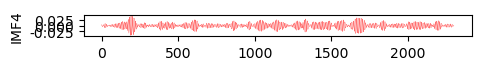

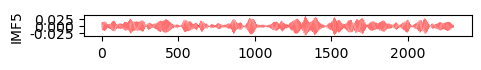

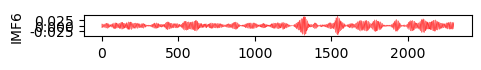

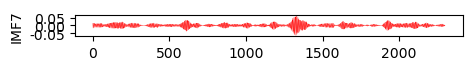

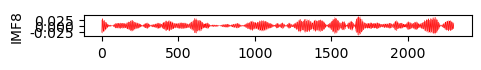

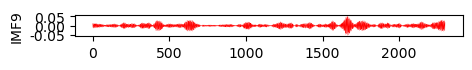

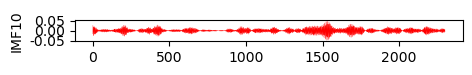

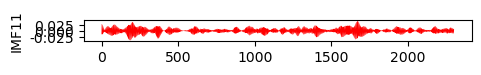

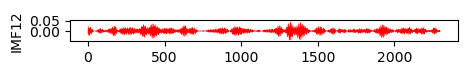

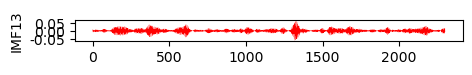

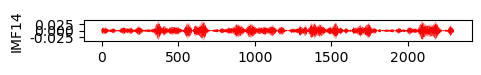

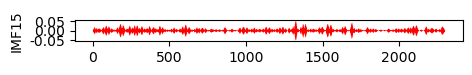

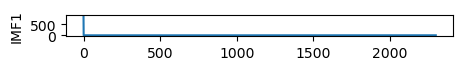

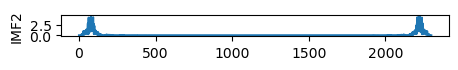

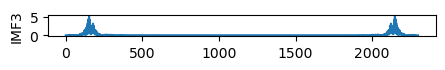

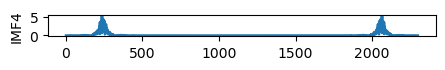

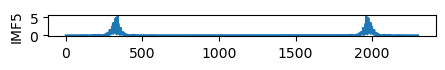

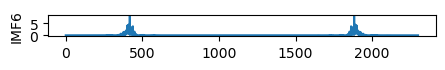

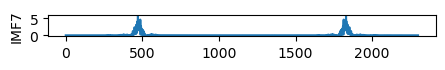

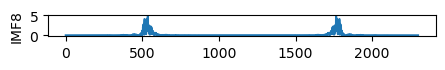

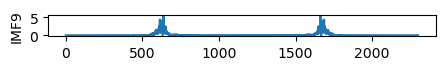

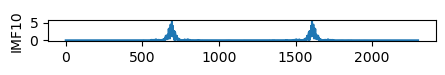

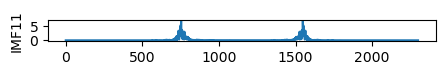

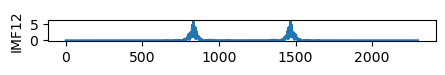

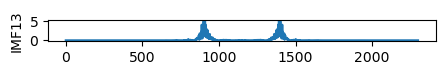

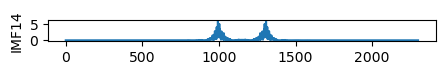

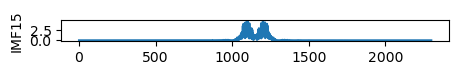

In [6]:
#未分解前的图
fig_return = plt.figure()
plt.plot(f['return'])
plt.figure(figsize=(5,5), dpi=100)
fig_return.suptitle('Original input signal and its components')

#循环每个分解模态的
for i in range(K):
    plt.figure(figsize=(5,5), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(u[i,:], linewidth=0.2, c='r')
    plt.ylabel('IMF{}'.format(i+1))
    
    #每个模态的中心频率
for i in range(K):
    plt.figure(figsize=(5,5), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(abs(fft(u[i,:])))
    plt.ylabel('IMF{}'.format(i+1))



### IMF of volatility

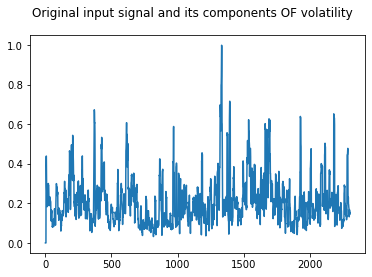

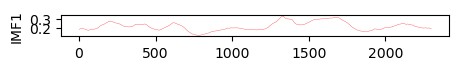

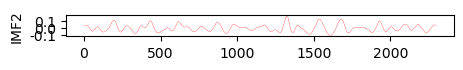

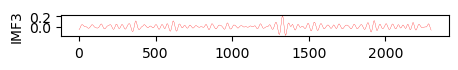

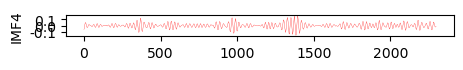

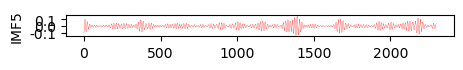

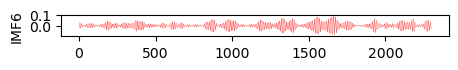

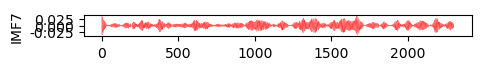

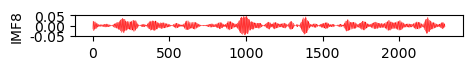

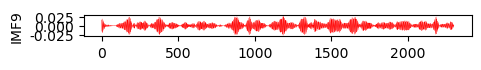

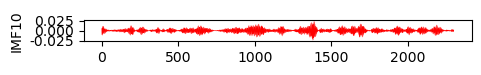

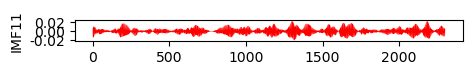

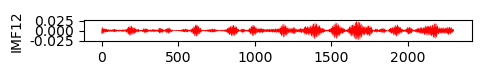

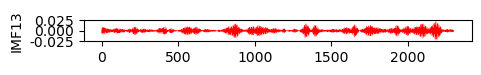

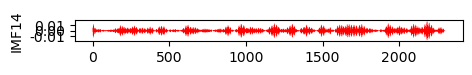

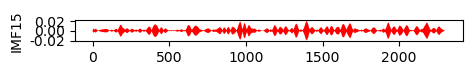

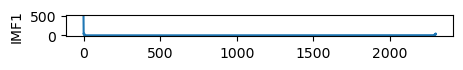

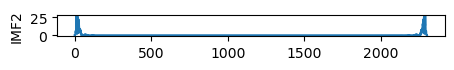

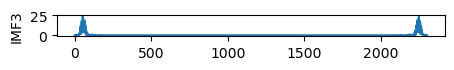

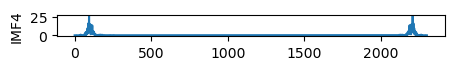

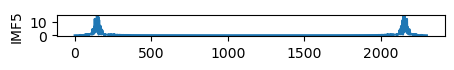

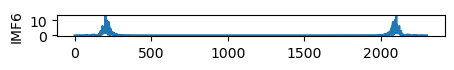

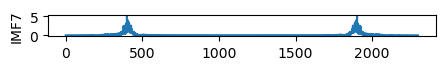

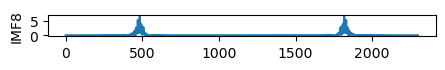

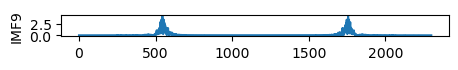

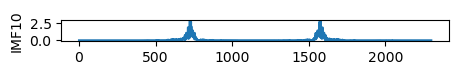

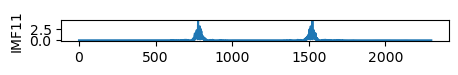

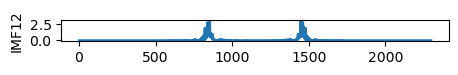

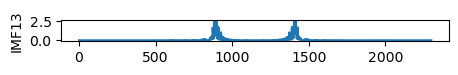

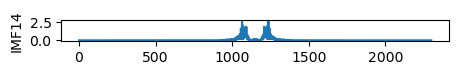

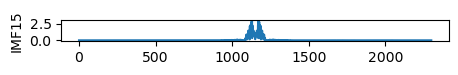

In [7]:
#未分解前的图
fig_volatility = plt.figure()
plt.plot(f['volatility'])
fig_volatility.suptitle('Original input signal and its components OF volatility')

#循环每个分解模态的
for i in range(K):
    plt.figure(figsize=(5,5), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(u1[i,:], linewidth=0.2, c='r')
    plt.ylabel('IMF{}'.format(i+1))
    
    #每个模态的中心频率
for i in range(K):
    plt.figure(figsize=(5,5), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(abs(fft(u1[i,:])))
    plt.ylabel('IMF{}'.format(i+1))

# 3.文本处理

In [8]:
filepath1='./text.csv'
text=pd.read_csv(filepath1)
pd.to_datetime(text.date)

0      2019-07-01
1      2019-06-06
2      2019-05-13
3      2019-04-25
4      2019-04-08
          ...    
3286   2010-01-06
3287   2010-01-05
3288   2010-01-05
3289   2010-01-04
3290   2010-01-04
Name: date, Length: 3291, dtype: datetime64[ns]

### (1).文本预处理

In [9]:
titles=text.title
titles1=[]

for i in range(len(titles)):
    textgo = re.sub('[^\u4e00-\u9fa5_a-zA-Z0-9]','',str(titles[i]))
    titles1.append(textgo) 


In [10]:
len(titles1)

3291

###  (2).文本分词

In [11]:
type(titles1)

list

In [12]:
seg = pkuseg.pkuseg() # 以默认配置加载模型

In [13]:
textcut=[]
for j in titles1:  
    textfo=seg.cut( j )  # 进行分词
    textcut.append(textfo)
    
text_cut=pd.Series(textcut)##list换series，然后放入表中

In [14]:
text.insert(loc=1,column='text_cut',value=text_cut)

In [15]:
text

,title,text_cut,date
0,中美元首会晤，习近平同特朗普谈了这些大事,"[中, 美元, 首, 会晤, 习近平, 同, 特朗普, 谈, 了, 这些, 大事]",2019/7/1
1,投机基金仍然看空大豆市场，但是过去一周减持净空单,"[投机, 基金, 仍然, 看空, 大豆, 市场, 但是, 过去, 一, 周, 减持, 净空单]",2019/6/6
2,香港查出非洲猪瘟病毒感染政府销毁上水屠宰场600头生猪,"[香港, 查出, 非洲, 猪瘟, 病毒, 感染, 政府, 销毁, 上水, 屠宰场, 600,...",2019/5/13
3,投机基金在CBOT大豆期市的净空单创下15个月新高,"[投机, 基金, 在, CBOT, 大豆, 期市, 的, 净空单, 创下, 15, 个, 月...",2019/4/25
4,西藏自治区林芝市发生非洲猪瘟疫情,"[西藏, 自治区, 林芝市, 发生, 非洲, 猪瘟, 疫情]",2019/4/8
...,...,...,...
3286,美国大豆进口订货量过高，或造成供过于求,"[美国, 大豆, 进口, 订货量, 过, 高, 或, 造成, 供过于求]",2010/1/6
3287,政策预期助推农产品期货走强,"[政策, 预期, 助推, 农产品, 期货, 走强]",2010/1/5
3288,78家大豆加工企业暂被取消补贴资格,"[78, 家, 大豆, 加工, 企业, 暂, 被, 取消, 补贴, 资格]",2010/1/5
3289,关于东北大豆市场补贴消息播报,"[关于, 东北, 大豆, 市场, 补贴, 消息, 播报]",2010/1/4


###  (3).去除停用词（采用中文停用词表）

In [16]:
def stopwordslist(filepath):   # 定义函数创建停用词列表
    stopword = [line.strip() for line in open(filepath,encoding='utf-8').readlines()]    #以行的形式读取停用词表，同时转换为列表
    return stopword

filepath='./cn_stopwords.txt'
stopwords = stopwordslist(filepath)

In [17]:
text_cut[0][1]

'美元'

In [18]:
type(text_cut)

pandas.core.series.Series

In [19]:
lastsentences=[]
lastsentences_str=[]##增加列表内是字符串的一项，方便进行向量化处理
for i in range(len(text_cut)):     #for循环遍历分词后的每个词语
    lastsentence=[]
    for word in text_cut[i]:
        if word not in stopwords:     #判断分词后的词语是否在停用词表内
            lastsentence.append(word)
            lastsentence_str=' '.join(lastsentence)
    lastsentences.append(lastsentence)
    lastsentences_str.append(lastsentence_str)
text_cut_stopwords=pd.Series(lastsentences)
text_cut_stopwords_str=pd.Series(lastsentences_str)
text.insert(loc=2,column='text_cut_stopwords',value=text_cut_stopwords)
text.insert(loc=2,column='text_cut_stopwords_str',value=text_cut_stopwords_str)

In [20]:
lastsentences_str

['中 美元 首 会晤 习近平 特朗普 谈 大事',
 '投机 基金 仍然 看空 大豆 市场 过去 周 减持 净空单',
 '香港 非洲 猪瘟 病毒 感染 政府 销毁 上水 屠宰场 600 头 生猪',
 '投机 基金 CBOT 大豆 期市 净空单 15 月 新高',
 '西藏 自治区 林芝市 非洲 猪瘟 疫情',
 '大商 发布 2018年 自律 监管 工作 报告 正 加快 推进 黄 大豆 1号 品种 国际化',
 '黑龙江 新 品系 大豆蛋白 含量 创 4796 新高',
 '中国 需要 支持 国内 大豆 种植户 增强 食品 安全',
 '商务部 中 美 明年 一月 贸易 会谈 做出 安排',
 '我国 调整 部分 商品 进出口 关税 杂粕 进口 税率 调整',
 '允许 阿根廷 豆粕 出口 中国 谈判 停滞不前',
 '2018年 中国 黑龙江省 玉米 补贴 大幅 削减 大豆 补贴 翻倍',
 '周三 中国 拍卖会 售出 97万 吨 国储 大豆',
 '美国 约 600亿 美元 进口 商品 加征 关税 公告',
 '美国 约 600亿 美元 进口 商品 加征 关税 公告',
 '内蒙古 自治区 锡林郭勒盟 正蓝旗 非洲 猪瘟 疫情',
 '中国 大豆 用量 预期 放慢',
 '中国 海关 埃塞俄比亚 大豆 正式 我国 出口',
 '江苏省 无锡市 宜兴市 非洲 猪瘟 疫情',
 '国务院 决定 美 600亿 美元 进口 商品 加征 关税',
 '外交 部长 王毅 中 美 大方向上 达成 一致',
 '中国 买家 取消 采购 美国 大豆',
 '中国 停止 进口 美豆 进口国 抢购 美国 供应',
 '中 储粮 集团 中国 需要 采购 美国 大豆 用于 国储 库存',
 '国内 商品 夜盘 大豆 豆粕 高 回落',
 '农业 农村部 今年 东北 种植 大豆 政策 含金量 高',
 '商务部 公布 原产于 美国 进口 高粱反 倾销 调查 初步 裁定',
 '农业 农村部 大豆 进口 供应 预计 基本 正常',
 '今年 黑龙江省 大豆 种植 意向 减少',
 '商所 调整 黄 大豆 2号 品种 指定 交割库',
 '市场 消息 吉林 大豆 加工 补贴 确定 300 元 吨',
 '上期 能源 负责人 回应 原油 期货 市场 热点 问题',
 '吉林 发布 饲料 加

In [21]:
text.text_cut_stopwords[0]

['中', '美元', '首', '会晤', '习近平', '特朗普', '谈', '大事']

In [22]:
text

,title,text_cut,text_cut_stopwords_str,text_cut_stopwords,date
0,中美元首会晤，习近平同特朗普谈了这些大事,"[中, 美元, 首, 会晤, 习近平, 同, 特朗普, 谈, 了, 这些, 大事]",中 美元 首 会晤 习近平 特朗普 谈 大事,"[中, 美元, 首, 会晤, 习近平, 特朗普, 谈, 大事]",2019/7/1
1,投机基金仍然看空大豆市场，但是过去一周减持净空单,"[投机, 基金, 仍然, 看空, 大豆, 市场, 但是, 过去, 一, 周, 减持, 净空单]",投机 基金 仍然 看空 大豆 市场 过去 周 减持 净空单,"[投机, 基金, 仍然, 看空, 大豆, 市场, 过去, 周, 减持, 净空单]",2019/6/6
2,香港查出非洲猪瘟病毒感染政府销毁上水屠宰场600头生猪,"[香港, 查出, 非洲, 猪瘟, 病毒, 感染, 政府, 销毁, 上水, 屠宰场, 600,...",香港 非洲 猪瘟 病毒 感染 政府 销毁 上水 屠宰场 600 头 生猪,"[香港, 非洲, 猪瘟, 病毒, 感染, 政府, 销毁, 上水, 屠宰场, 600, 头, 生猪]",2019/5/13
3,投机基金在CBOT大豆期市的净空单创下15个月新高,"[投机, 基金, 在, CBOT, 大豆, 期市, 的, 净空单, 创下, 15, 个, 月...",投机 基金 CBOT 大豆 期市 净空单 15 月 新高,"[投机, 基金, CBOT, 大豆, 期市, 净空单, 15, 月, 新高]",2019/4/25
4,西藏自治区林芝市发生非洲猪瘟疫情,"[西藏, 自治区, 林芝市, 发生, 非洲, 猪瘟, 疫情]",西藏 自治区 林芝市 非洲 猪瘟 疫情,"[西藏, 自治区, 林芝市, 非洲, 猪瘟, 疫情]",2019/4/8
...,...,...,...,...,...
3286,美国大豆进口订货量过高，或造成供过于求,"[美国, 大豆, 进口, 订货量, 过, 高, 或, 造成, 供过于求]",美国 大豆 进口 订货量 高 造成 供过于求,"[美国, 大豆, 进口, 订货量, 高, 造成, 供过于求]",2010/1/6
3287,政策预期助推农产品期货走强,"[政策, 预期, 助推, 农产品, 期货, 走强]",政策 预期 助推 农产品 期货 走强,"[政策, 预期, 助推, 农产品, 期货, 走强]",2010/1/5
3288,78家大豆加工企业暂被取消补贴资格,"[78, 家, 大豆, 加工, 企业, 暂, 被, 取消, 补贴, 资格]",78 家 大豆 加工 企业 暂 取消 补贴 资格,"[78, 家, 大豆, 加工, 企业, 暂, 取消, 补贴, 资格]",2010/1/5
3289,关于东北大豆市场补贴消息播报,"[关于, 东北, 大豆, 市场, 补贴, 消息, 播报]",东北 大豆 市场 补贴 消息 播报,"[东北, 大豆, 市场, 补贴, 消息, 播报]",2010/1/4


###  (4).向量转换（BoW & TF-IDF）

In [23]:
#CountVectorizer和TfidfTransformer默认学习list里的str（在str中以空格为分断），所以对象应该换成list(‘str1’,‘str2’,...)
vectorizer = CountVectorizer(min_df=1,max_df=0.8) ##创建单词表时，忽略占比超过百分之五十的词 以及 出现数少于2的词
transformer = TfidfTransformer() 
X = vectorizer.fit_transform(lastsentences_str)#学习词汇，返回文档术语与矩阵
feature_name = vectorizer.get_feature_names()#显示特征名
tfidf = transformer.fit_transform(X)  #把已经生成的文档矩阵换成TF-IDF矩阵
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### (5).情感分析

##### 求情感指数（用snownlp包）

In [24]:
sentiment=[]
for i in range(len(text_cut_stopwords_str)):
    sentiment.append(SnowNLP(text_cut_stopwords_str[i]).sentiments)
text.insert(loc=5,column='sentiment',value=sentiment)
text

,title,text_cut,text_cut_stopwords_str,text_cut_stopwords,date,sentiment
0,中美元首会晤，习近平同特朗普谈了这些大事,"[中, 美元, 首, 会晤, 习近平, 同, 特朗普, 谈, 了, 这些, 大事]",中 美元 首 会晤 习近平 特朗普 谈 大事,"[中, 美元, 首, 会晤, 习近平, 特朗普, 谈, 大事]",2019/7/1,0.988380
1,投机基金仍然看空大豆市场，但是过去一周减持净空单,"[投机, 基金, 仍然, 看空, 大豆, 市场, 但是, 过去, 一, 周, 减持, 净空单]",投机 基金 仍然 看空 大豆 市场 过去 周 减持 净空单,"[投机, 基金, 仍然, 看空, 大豆, 市场, 过去, 周, 减持, 净空单]",2019/6/6,0.889136
2,香港查出非洲猪瘟病毒感染政府销毁上水屠宰场600头生猪,"[香港, 查出, 非洲, 猪瘟, 病毒, 感染, 政府, 销毁, 上水, 屠宰场, 600,...",香港 非洲 猪瘟 病毒 感染 政府 销毁 上水 屠宰场 600 头 生猪,"[香港, 非洲, 猪瘟, 病毒, 感染, 政府, 销毁, 上水, 屠宰场, 600, 头, 生猪]",2019/5/13,0.949319
3,投机基金在CBOT大豆期市的净空单创下15个月新高,"[投机, 基金, 在, CBOT, 大豆, 期市, 的, 净空单, 创下, 15, 个, 月...",投机 基金 CBOT 大豆 期市 净空单 15 月 新高,"[投机, 基金, CBOT, 大豆, 期市, 净空单, 15, 月, 新高]",2019/4/25,0.422487
4,西藏自治区林芝市发生非洲猪瘟疫情,"[西藏, 自治区, 林芝市, 发生, 非洲, 猪瘟, 疫情]",西藏 自治区 林芝市 非洲 猪瘟 疫情,"[西藏, 自治区, 林芝市, 非洲, 猪瘟, 疫情]",2019/4/8,0.892726
...,...,...,...,...,...,...
3286,美国大豆进口订货量过高，或造成供过于求,"[美国, 大豆, 进口, 订货量, 过, 高, 或, 造成, 供过于求]",美国 大豆 进口 订货量 高 造成 供过于求,"[美国, 大豆, 进口, 订货量, 高, 造成, 供过于求]",2010/1/6,0.765290
3287,政策预期助推农产品期货走强,"[政策, 预期, 助推, 农产品, 期货, 走强]",政策 预期 助推 农产品 期货 走强,"[政策, 预期, 助推, 农产品, 期货, 走强]",2010/1/5,0.896063
3288,78家大豆加工企业暂被取消补贴资格,"[78, 家, 大豆, 加工, 企业, 暂, 被, 取消, 补贴, 资格]",78 家 大豆 加工 企业 暂 取消 补贴 资格,"[78, 家, 大豆, 加工, 企业, 暂, 取消, 补贴, 资格]",2010/1/5,0.003893
3289,关于东北大豆市场补贴消息播报,"[关于, 东北, 大豆, 市场, 补贴, 消息, 播报]",东北 大豆 市场 补贴 消息 播报,"[东北, 大豆, 市场, 补贴, 消息, 播报]",2010/1/4,0.086830


##### 创建固定长度的连续时间序列

In [25]:
#创建对应日期数组,创建固定长度的日期索引
senti_date=pd.date_range('20100105','20190630')
senti_date

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=3464, freq='D')

In [26]:
#把日期索引到新表中
senti_all_date=pd.DataFrame(index=senti_date)

##### 按日期groupby，取均值为唯一值,并将值映射到连续时间序列，空值设为0.5

In [27]:
##按日期分组，取均值，并重新设置索引列，sentiment列被替换为取均值后的列
text['date']=pd.to_datetime(text['date'])
get_mean=text[['date','sentiment']].groupby('date')['sentiment'].mean().reset_index().rename(columns={"data":"data","sentiment":"mean_senti"})
get_mean

,date,mean_senti
0,2010-01-04,0.308860
1,2010-01-05,0.449978
2,2010-01-06,0.642909
3,2010-01-07,0.621124
4,2010-01-08,0.670963
...,...,...
1178,2019-04-08,0.892726
1179,2019-04-25,0.422487
1180,2019-05-13,0.949319
1181,2019-06-06,0.889136


In [28]:
#将日期和值打包，并将日期作为字典
dict(zip(get_mean.date,get_mean.mean_senti))

{Timestamp('2010-01-04 00:00:00'): 0.30886004326604405,
 Timestamp('2010-01-05 00:00:00'): 0.44997791281501587,
 Timestamp('2010-01-06 00:00:00'): 0.6429093150549112,
 Timestamp('2010-01-07 00:00:00'): 0.621123777130917,
 Timestamp('2010-01-08 00:00:00'): 0.6709627931760536,
 Timestamp('2010-01-11 00:00:00'): 0.9109092641611901,
 Timestamp('2010-01-12 00:00:00'): 0.9717394147169146,
 Timestamp('2010-01-13 00:00:00'): 0.6437493408742505,
 Timestamp('2010-01-14 00:00:00'): 0.05444846525005276,
 Timestamp('2010-01-15 00:00:00'): 0.24286597735805782,
 Timestamp('2010-01-18 00:00:00'): 0.9182623346154309,
 Timestamp('2010-01-19 00:00:00'): 0.7346280020044533,
 Timestamp('2010-01-22 00:00:00'): 0.9927377341468442,
 Timestamp('2010-01-25 00:00:00'): 0.5765589918510927,
 Timestamp('2010-01-26 00:00:00'): 0.632196486775434,
 Timestamp('2010-01-27 00:00:00'): 0.5945506741895381,
 Timestamp('2010-01-28 00:00:00'): 0.5343467463708674,
 Timestamp('2010-01-29 00:00:00'): 0.6151075477844572,
 Timesta

In [29]:
#将生成的固定长度的连续时间序列与已经拿出来的均值数据做映射，并把nan改为0.5（意为不受当天新闻的影响）
senti_all_date['sentiment2']=senti_all_date.index.map(dict(zip(get_mean.date,get_mean.mean_senti)))
senti=senti_all_date.reset_index().rename(columns={"index":"date","sentiment2":"mean_senti_all"})
senti=senti.where((senti.notna()),0.5)##用fillna只对str有效，.where适用于任何数据类型
senti.head(11)

,date,mean_senti_all
0,2010-01-05,0.449978
1,2010-01-06,0.642909
2,2010-01-07,0.621124
3,2010-01-08,0.670963
4,2010-01-09,0.500000
5,2010-01-10,0.500000
6,2010-01-11,0.910909
7,2010-01-12,0.971739
8,2010-01-13,0.643749
9,2010-01-14,0.054448


##### 滚动窗口求累积分数

In [30]:
#定义滚动窗口函数
def Cumulated(senti):
    cum=[a,b,c,d,e,f]
    for i in range(6,len(senti)):
        for j in range(1,7):
            exp_sum=math.exp(-j/7)*senti[i-j]
        cum.append(senti[i]+exp_sum)
    return cum
a=0.308860
b=0.449978
c=0.642909
d=0.621124
e=0.670963
f=0.500000
cum_senti=senti['mean_senti_all'].tolist()
Cumulated(cum_senti)

[0.30886,
 0.449978,
 0.642909,
 0.621124,
 0.670963,
 0.5,
 1.101867671514273,
 1.244572670258986,
 0.9073374056929134,
 0.3391868551335295,
 0.4550524001965328,
 0.712186422838475,
 0.8865651565855808,
 1.3306421552953018,
 1.0078177416939198,
 0.5231064501409074,
 0.6030657259295527,
 1.204924156985319,
 0.712186422838475,
 0.8896856000187101,
 0.8883151675756946,
 0.844382909613909,
 0.8067370970280131,
 0.9556376836216511,
 0.8272939706229322,
 0.712186422838475,
 0.7446759800724816,
 1.0994462727150338,
 0.7318487339979234,
 1.1620807674287248,
 0.8069465464247685,
 1.0531348139127619,
 0.712186422838475,
 0.8527214163857946,
 0.7035027242478542,
 0.8969237811375168,
 0.731670061715306,
 0.8568756617876477,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 0.712186422838475,
 1.157118041915711,
 0.858134617479169,
 0.8551119023268277,
 1.1167327183287008,
 1.106500945491

In [31]:
senti['cum_senti']=Cumulated(cum_senti)
senti.head(10)

,date,mean_senti_all,cum_senti
0,2010-01-05,0.449978,0.308860
1,2010-01-06,0.642909,0.449978
2,2010-01-07,0.621124,0.642909
3,2010-01-08,0.670963,0.621124
4,2010-01-09,0.500000,0.670963
5,2010-01-10,0.500000,0.500000
6,2010-01-11,0.910909,1.101868
7,2010-01-12,0.971739,1.244573
8,2010-01-13,0.643749,0.907337
9,2010-01-14,0.054448,0.339187


# 4.merge

In [32]:
senti['return']=senti['date'].map(dict(zip(Data['date'],Data['return'])))
senti['volatility']=senti['date'].map(dict(zip(Data['date'],Data['volatility'])))
senti['close']=senti['date'].map(dict(zip(Data['date'],Data['close'])))
senti['open']=senti['date'].map(dict(zip(Data['date'],Data['open'])))
senti['high']=senti['date'].map(dict(zip(Data['date'],Data['high'])))
senti['low']=senti['date'].map(dict(zip(Data['date'],Data['low'])))
merge=senti.drop('mean_senti_all',axis=1).dropna(axis=0)
order=['date','cum_senti','open','close','high','low','return','volatility']
merge=merge[order]
merge.set_index('date', drop= True, inplace=True)
merge

,cum_senti,open,close,high,low,return,volatility
date,,,,,,,
2010-01-05,0.308860,4067.0,4066.0,4082.0,4060.0,0.396337,0.000000
2010-01-06,0.449978,4066.0,4154.0,4194.0,4057.0,0.505489,0.000000
2010-01-07,0.642909,4165.0,4044.0,4188.0,3975.0,0.231045,0.000000
2010-01-08,0.621124,4040.0,3981.0,4050.0,3947.0,0.294409,0.000000
2010-01-11,1.101868,4012.0,4031.0,4050.0,4012.0,0.454695,0.000000
...,...,...,...,...,...,...,...
2019-06-24,0.712186,3431.0,3443.0,3450.0,3413.0,0.388658,0.131966
2019-06-25,0.712186,3450.0,3472.0,3484.0,3442.0,0.431432,0.155605
2019-06-26,0.712186,3467.0,3432.0,3479.0,3426.0,0.317786,0.167465


In [33]:
u=u.tolist()
u1=u1.tolist()

In [34]:
##调整格式并进行归一化
df_u=pd.DataFrame()
df_u1=pd.DataFrame()
for i in range(15):
    df_u['return_IMF{}'.format(i+1)]=u[i]
for j in range(15):
    df_u1['volatility _IMF{}'.format(j+1)]=u1[j]
df_u = minmax.fit_transform(df_u)
df_u1 = minmax.fit_transform(df_u1)

# print(df_u1[1,:].shape)

In [35]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torch.autograd import Variable

### 5.1数据处理

In [36]:
##加入所有IMF
for i in range(15):
    merge['return_IMF{}'.format(i+1)]=df_u[:,i]
for j in range(15):
    merge['volatility _IMF{}'.format(j+1)]=df_u1[:,j]
merge

,cum_senti,open,close,high,low,return,volatility,return_IMF1,return_IMF2,return_IMF3,...,volatility _IMF6,volatility _IMF7,volatility _IMF8,volatility _IMF9,volatility _IMF10,volatility _IMF11,volatility _IMF12,volatility _IMF13,volatility _IMF14,volatility _IMF15
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.308860,4067.0,4066.0,4082.0,4060.0,0.396337,0.000000,0.081302,0.528287,0.728948,...,0.384131,0.979578,0.321925,0.210866,0.619053,0.612814,0.582381,0.555448,0.442713,0.490912
2010-01-06,0.449978,4066.0,4154.0,4194.0,4057.0,0.505489,0.000000,0.081130,0.523657,0.673183,...,0.399331,0.532578,0.626462,0.772315,0.283497,0.168262,0.327899,0.346582,0.657848,0.537845
2010-01-07,0.642909,4165.0,4044.0,4188.0,3975.0,0.231045,0.000000,0.076624,0.512469,0.572229,...,0.432896,0.060547,0.741194,0.808388,0.583964,0.654669,0.657262,0.662271,0.246385,0.436452
2010-01-08,0.621124,4040.0,3981.0,4050.0,3947.0,0.294409,0.000000,0.078735,0.502837,0.456593,...,0.488911,0.019224,0.474667,0.243663,0.648855,0.560982,0.479612,0.386958,0.805606,0.577664
2010-01-11,1.101868,4012.0,4031.0,4050.0,4012.0,0.454695,0.000000,0.084390,0.493670,0.350267,...,0.560398,0.444112,0.236946,0.137799,0.254851,0.145288,0.356903,0.468031,0.144249,0.400486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.712186,3431.0,3443.0,3450.0,3413.0,0.388658,0.131966,0.310572,0.632029,0.498359,...,0.592757,0.527627,0.396266,0.508062,0.440711,0.211804,0.570851,0.493275,0.494101,0.493867
2019-06-25,0.712186,3450.0,3472.0,3484.0,3442.0,0.431432,0.155605,0.307361,0.676986,0.463044,...,0.513226,0.611669,0.471403,0.567977,0.547947,0.577095,0.479748,0.462220,0.493534,0.503711
2019-06-26,0.712186,3467.0,3432.0,3479.0,3426.0,0.317786,0.167465,0.304882,0.712730,0.432586,...,0.436533,0.594826,0.591660,0.476280,0.519518,0.604940,0.469022,0.543500,0.499951,0.494513


In [37]:
data_transform = minmax.fit_transform(merge[['cum_senti','open','close','high','low']])
data_transform_list = data_transform.tolist()
data_transform_list 

#建空列表把循环出来每次嵌套列表的数装在新的列表中
empt_cum_senti=[]
empt_open=[]
empt_close=[]
empt_high=[]
empt_low=[]
for i in range(len(data_transform_list)):
    empt_cum_senti.append(data_transform_list[i][0])
    empt_open.append(data_transform_list[i][1])
    empt_close.append(data_transform_list[i][2])
    empt_high.append(data_transform_list[i][3])
    empt_low.append(data_transform_list[i][4])
merge['cum_senti']=empt_cum_senti
merge['open']=empt_open
merge['close']=empt_close
merge['high']=empt_high
merge['low']=empt_low



merge

,cum_senti,open,close,high,low,return,volatility,return_IMF1,return_IMF2,return_IMF3,...,volatility _IMF6,volatility _IMF7,volatility _IMF8,volatility _IMF9,volatility _IMF10,volatility _IMF11,volatility _IMF12,volatility _IMF13,volatility _IMF14,volatility _IMF15
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.188337,0.500000,0.488785,0.483447,0.501853,0.396337,0.000000,0.081302,0.528287,0.728948,...,0.384131,0.979578,0.321925,0.210866,0.619053,0.612814,0.582381,0.555448,0.442713,0.490912
2010-01-06,0.291741,0.499465,0.534690,0.542302,0.500265,0.505489,0.000000,0.081130,0.523657,0.673183,...,0.399331,0.532578,0.626462,0.772315,0.283497,0.168262,0.327899,0.346582,0.657848,0.537845
2010-01-07,0.433109,0.552463,0.477308,0.539149,0.456855,0.231045,0.000000,0.076624,0.512469,0.572229,...,0.432896,0.060547,0.741194,0.808388,0.583964,0.654669,0.657262,0.662271,0.246385,0.436452
2010-01-08,0.417147,0.485546,0.444444,0.466632,0.442033,0.294409,0.000000,0.078735,0.502837,0.456593,...,0.488911,0.019224,0.474667,0.243663,0.648855,0.560982,0.479612,0.386958,0.805606,0.577664
2010-01-11,0.769408,0.470557,0.470527,0.466632,0.476443,0.454695,0.000000,0.084390,0.493670,0.350267,...,0.560398,0.444112,0.236946,0.137799,0.254851,0.145288,0.356903,0.468031,0.144249,0.400486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.483872,0.159529,0.163798,0.151340,0.159344,0.388658,0.131966,0.310572,0.632029,0.498359,...,0.592757,0.527627,0.396266,0.508062,0.440711,0.211804,0.570851,0.493275,0.494101,0.493867
2019-06-25,0.483872,0.169700,0.178925,0.169207,0.174696,0.431432,0.155605,0.307361,0.676986,0.463044,...,0.513226,0.611669,0.471403,0.567977,0.547947,0.577095,0.479748,0.462220,0.493534,0.503711
2019-06-26,0.483872,0.178801,0.158059,0.166579,0.166226,0.317786,0.167465,0.304882,0.712730,0.432586,...,0.436533,0.594826,0.591660,0.476280,0.519518,0.604940,0.469022,0.543500,0.499951,0.494513


### 5.2 导入数据

# 5.建模预测

###### 5.2.1 构造包含时间窗口的新数据集

In [38]:
#建立滑动窗口，重组数据 X1，Y1属于预测timestep时间后return的特征，而X2，Y2属于预测volatility的特征
##整个数据是三层，最内层是由前10天每一天的收益和波动在内的特征，其次是将10天数据进行打包，集中预测下一个
def create_dataset(data, time_step):
    arr_x1, arr_x2,arr_y1, arr_y2 =[], [], [],[]
    for i in range(len(data) - time_step - 1):
        x_1,x_2 = [],[]
        for j in range(time_step):
            x0 = data[:,0][i+j]
            x1 = data[:,1][i+j]
            x2 = data[:,2][i+j]
            x3 = data[:,3][i+j]
            x4 = data[:,4][i+j]##return
            x5 = data[:,5][i+j]##volatility
            x6 = data[:,6][i+j]
            x7 = data[:,7][i+j]
            x8 = data[:,8][i+j]
            xj1=[x0,x1,x2,x3,x4,x5,x7]##return预测的特征集合
            xj2=[x0,x1,x2,x3,x4,x6,x8]##volatility预测的特征集合
            x_1.append(xj1)
            x_2.append(xj2)
        y1 = data[:,5][i + time_step]
        y2 = data[:,6][i + time_step]
        arr_x1.append(x_1)
        arr_x2.append(x_2)
        arr_y1.append(y1)
        arr_y2.append(y2)        
    return np.array(arr_x1),np.array(arr_x2) ,np.array(arr_y1),np.array(arr_y2)

time_step = 19
df1=merge[['open','close','high','low','cum_senti','return','volatility','return_IMF1','volatility _IMF1']].values
df1_X1, df1_X2, df1_Y1,df1_Y2 = create_dataset(df1, time_step)
r1_data=[df1_X1,df1_Y1]
v1_data=[df1_X2,df1_Y2]

##return的特征和标签
r1_features=torch.from_numpy(df1_X1).type(torch.float32)
r1_labels=torch.from_numpy(df1_Y1).type(torch.float32)
##volatility的特征和标签
v1_features=torch.from_numpy(df1_X2).type(torch.float32)
v1_labels=torch.from_numpy(df1_Y2).type(torch.float32)

# print(len(features1))
print(len(r1_labels))
# print(type(features1))
# print(features1)
print(r1_labels)

2280
tensor([0.2568, 0.3337, 0.4549,  ..., 0.4314, 0.3178, 0.3804])


###### 5.2.2 划分数据集
包括特征和标签，训练集和测试集

In [39]:
##划分features和labels1

# features=torch.from_numpy(features).type(torch.float32)
# labels1=merge[['return']].values
# labels1=torch.from_numpy(labels1).type(torch.float32)

##划分train和test      
train_size = int(len(r1_features) * 8/10)
val_size = int(len(r1_features) * 1/10)
test_size = len(r1_features) - train_size - val_size
# train_data, test_data = torch.utils.data.random_split(merge, [train_size, test_size])

r1_train_x=r1_features[:train_size]
r1_train_y=r1_labels[:train_size]
r1_val_x = r1_features[train_size:train_size + val_size]
r1_val_y = r1_labels[train_size:train_size + val_size]
r1_test_x=r1_features[train_size + val_size:]
r1_test_y=r1_labels[train_size + val_size:]


v1_train_x=v1_features[:train_size]
v1_train_y=v1_labels[:train_size]
v1_vel_x = v1_features[train_size:train_size + val_size]
v1_vel_y = v1_labels[train_size:train_size + val_size]
v1_test_x=v1_features[train_size + val_size:]
v1_test_y=v1_labels[train_size + val_size:]

In [40]:
r1_train_x[:6]
len(r1_train_x)
print(r1_train_y.shape)

torch.Size([1824])


##### 5.2.3 小批量数据读取

In [41]:
##读取数据集
batch_size = 24

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
    
    
    
# train_loader=data_iter(batch_size, train_x, train_y) 
# test_loader=data_iter(batch_size, test_x, test_y)

data_iter(batch_size, r1_train_x, r1_train_y)
data_iter(batch_size, r1_train_x, r1_train_y)
data_iter(batch_size, v1_train_x, v1_train_x)


<generator object data_iter at 0x7fe9a3e6e200>

In [42]:
r1_train_x

tensor([[[0.5000, 0.4888, 0.4834,  ..., 0.1883, 0.3963, 0.0813],
         [0.4995, 0.5347, 0.5423,  ..., 0.2917, 0.5055, 0.0811],
         [0.5525, 0.4773, 0.5391,  ..., 0.4331, 0.2310, 0.0766],
         ...,
         [0.4133, 0.4137, 0.4078,  ..., 0.5532, 0.4376, 0.2117],
         [0.4106, 0.3829, 0.3878,  ..., 0.6623, 0.2975, 0.2190],
         [0.3945, 0.3777, 0.3794,  ..., 0.5682, 0.3690, 0.2309]],

        [[0.4995, 0.5347, 0.5423,  ..., 0.2917, 0.5055, 0.0811],
         [0.5525, 0.4773, 0.5391,  ..., 0.4331, 0.2310, 0.0766],
         [0.4855, 0.4444, 0.4666,  ..., 0.4171, 0.2944, 0.0787],
         ...,
         [0.4106, 0.3829, 0.3878,  ..., 0.6623, 0.2975, 0.2190],
         [0.3945, 0.3777, 0.3794,  ..., 0.5682, 0.3690, 0.2309],
         [0.3779, 0.3333, 0.3610,  ..., 0.7676, 0.2568, 0.2444]],

        [[0.5525, 0.4773, 0.5391,  ..., 0.4331, 0.2310, 0.0766],
         [0.4855, 0.4444, 0.4666,  ..., 0.4171, 0.2944, 0.0787],
         [0.4706, 0.4705, 0.4666,  ..., 0.7694, 0.4547, 0.

### 5.3 构造模型 

In [43]:
##构造模型
# input_size = 6 # 定义输入的特征数
# output_size=1
# hidden_size = 5
# num_layers = 2

torch.manual_seed(1)
class LSTM(nn.Module):
    """搭建LSTM神经网络"""
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=7,
                            hidden_size=3,   # rnn 隐藏单元数
                            num_layers=1,     # rnn 层数
                            batch_first=True,          # If ``True``, then the input and output tensors are provided as (batch, seq, feature). Default: False
                            )
#         self.hidden = (torch.autograd.Variable(torch.zeros(1, 1, 32)),torch.autograd.Variable(torch.zeros(1, 1, 32)))
        self.output_layer = nn.Linear(3,1)  ##加一个全连接层的目的是为了维度变换（把输出换成你想要的维度）

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # lstm_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        lstm_out, (h_n, h_c) = self.lstm(x, None)  # If `(h_0, c_0)` is not provided, both **h_0** and **c_0** default to zero.
        output = self.output_layer(lstm_out[:,-1,:])   # 选择最后时刻lstm的输出
        return output


In [44]:
lstm = LSTM()
lstm

LSTM(
  (lstm): LSTM(7, 3, batch_first=True)
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

In [45]:
r1_train_x.shape

torch.Size([1824, 19, 7])

### 5.4 模型训练

In [46]:
##训练
epoches = 49
learning_rate = 0.1

# 定义优化器和损失函数
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()

for epoch in range(epoches):    
    for step, (batch_x, batch_y) in enumerate(data_iter(batch_size, r1_train_x, r1_train_y)):
        output = lstm(batch_x)##前向传播求出预测值
#         print(output)
#         break
        loss = loss_function(output, batch_y)##求loss
        optimizer.zero_grad()##梯度置零，也就是把loss关于weight的导数变成0
        loss.backward()##反向传播求梯度
        optimizer.step()##更新所有参数
    if epoch % 20 == 0:
        print("进行第{}个epoch".format(epoch))
#             pred_y = torch.max(test_output, dim=0)[0].data.numpy()
#             accuracy = ((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))            
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
        lstm_params = list(lstm.lstm.named_parameters())
        linear_params = list(lstm.output_layer.named_parameters())

        print(lstm_params.__len__())
        print(lstm_params[0])
        print(lstm_params[1])
        print(linear_params[0])

#test_output = lstm(test_x[:10])
#pred_y = torch.max(test_output, dim=0)[0].data.numpy().squeeze()
#print(test_y[:10])b



进行第0个epoch
Epoch:  0 | train loss: 0.0029
4
('weight_ih_l0', Parameter containing:
tensor([[-0.1860, -0.7374, -0.5957, -0.2108, -1.0919, -0.1530, -0.5864],
        [ 0.7044,  0.4888,  0.3404,  0.5674,  0.5369,  0.6292,  0.1196],
        [-0.6551, -0.6626, -0.5282, -0.6125, -0.3951, -0.4555, -0.8231],
        [-0.8862, -0.6335, -0.7867, -0.7213, -0.5422, -0.1963, -0.1998],
        [-0.2951,  0.6240,  0.4314,  0.8117,  0.8184, -0.2408, -0.3805],
        [-1.1533, -0.3652, -0.9709, -0.6241, -1.2093, -0.2968, -1.0448],
        [ 0.7465,  0.3174,  0.0097,  0.6061,  0.1329,  0.4921,  0.0103],
        [-0.5948, -1.0860, -0.8070, -0.2172, -0.7074,  0.0402, -0.0458],
        [ 0.4375,  0.0778,  0.8165,  0.6415,  0.1583,  0.8477,  0.7694],
        [ 0.0050, -0.8300, -0.6023, -0.5170, -0.4749, -0.9572, -0.9046],
        [-0.1469, -0.5987, -0.1784, -0.4326,  0.1458, -0.2151, -0.0454],
        [-0.3756, -1.1951, -0.3709, -1.0659, -1.3412, -0.6259, -0.7256]],
       requires_grad=True))
('weight_hh_


### 5.4 验证

In [47]:
from sklearn import metrics
r1_val_pred = lstm(r1_val_x).view(-1).data.numpy()
r1_val_y = r1_val_y.view(-1).data.numpy()

mae=metrics.mean_absolute_error(r1_val_y,r1_val_pred)
mse=metrics.mean_squared_error(r1_val_y,r1_val_pred)
rmse=np.sqrt(metrics.mean_squared_error(r1_val_y,r1_val_pred))
print("MAE: %.4f" % mae)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)



MAE: 0.0324
MSE: 0.0024
RMSE: 0.0487


### 5.5 测试

In [48]:
# for test_x_1,test_y_1 in data_iter(batch_size, test_x1, test_y1):
r1_test_pred = lstm(r1_test_x).view(-1).data.numpy()
r1_test_y=r1_test_y.view(-1).data.numpy()

mae=metrics.mean_absolute_error(r1_test_y,r1_test_pred)
mse=metrics.mean_squared_error(r1_test_y,r1_test_pred)
rmse=np.sqrt(metrics.mean_squared_error(r1_test_y,r1_test_pred))


print("MAE: %.4f" % mae)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)


MAE: 0.0399
MSE: 0.0035
RMSE: 0.0594


In [49]:
r1_test_pred

array([0.37988898, 0.380691  , 0.3809054 , 0.38195002, 0.38252857,
       0.38303316, 0.38358253, 0.38410726, 0.38470438, 0.38423297,
       0.3848866 , 0.38500592, 0.3853076 , 0.38856727, 0.3832393 ,
       0.38634303, 0.38583326, 0.38711706, 0.38551557, 0.38531464,
       0.38491434, 0.38483664, 0.384547  , 0.38428178, 0.38421136,
       0.3840663 , 0.38416442, 0.38434866, 0.384183  , 0.38448173,
       0.3842994 , 0.38448223, 0.38450882, 0.38444167, 0.384004  ,
       0.3818237 , 0.3836734 , 0.3833415 , 0.38109297, 0.3825462 ,
       0.38280845, 0.38158986, 0.3795066 , 0.3796552 , 0.37761676,
       0.37811044, 0.37639567, 0.37719178, 0.3767164 , 0.37509388,
       0.376248  , 0.37534997, 0.37544873, 0.37556517, 0.3745236 ,
       0.37333924, 0.372082  , 0.37197053, 0.3693862 , 0.36886707,
       0.36723572, 0.36432582, 0.36275205, 0.360817  , 0.35880572,
       0.35748446, 0.35619575, 0.3527317 , 0.34923282, 0.34503287,
       0.34669816, 0.34296784, 0.3351068 , 0.3407836 , 0.33962